In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

### Demonstrating radial search

In [2]:
dpi = 400

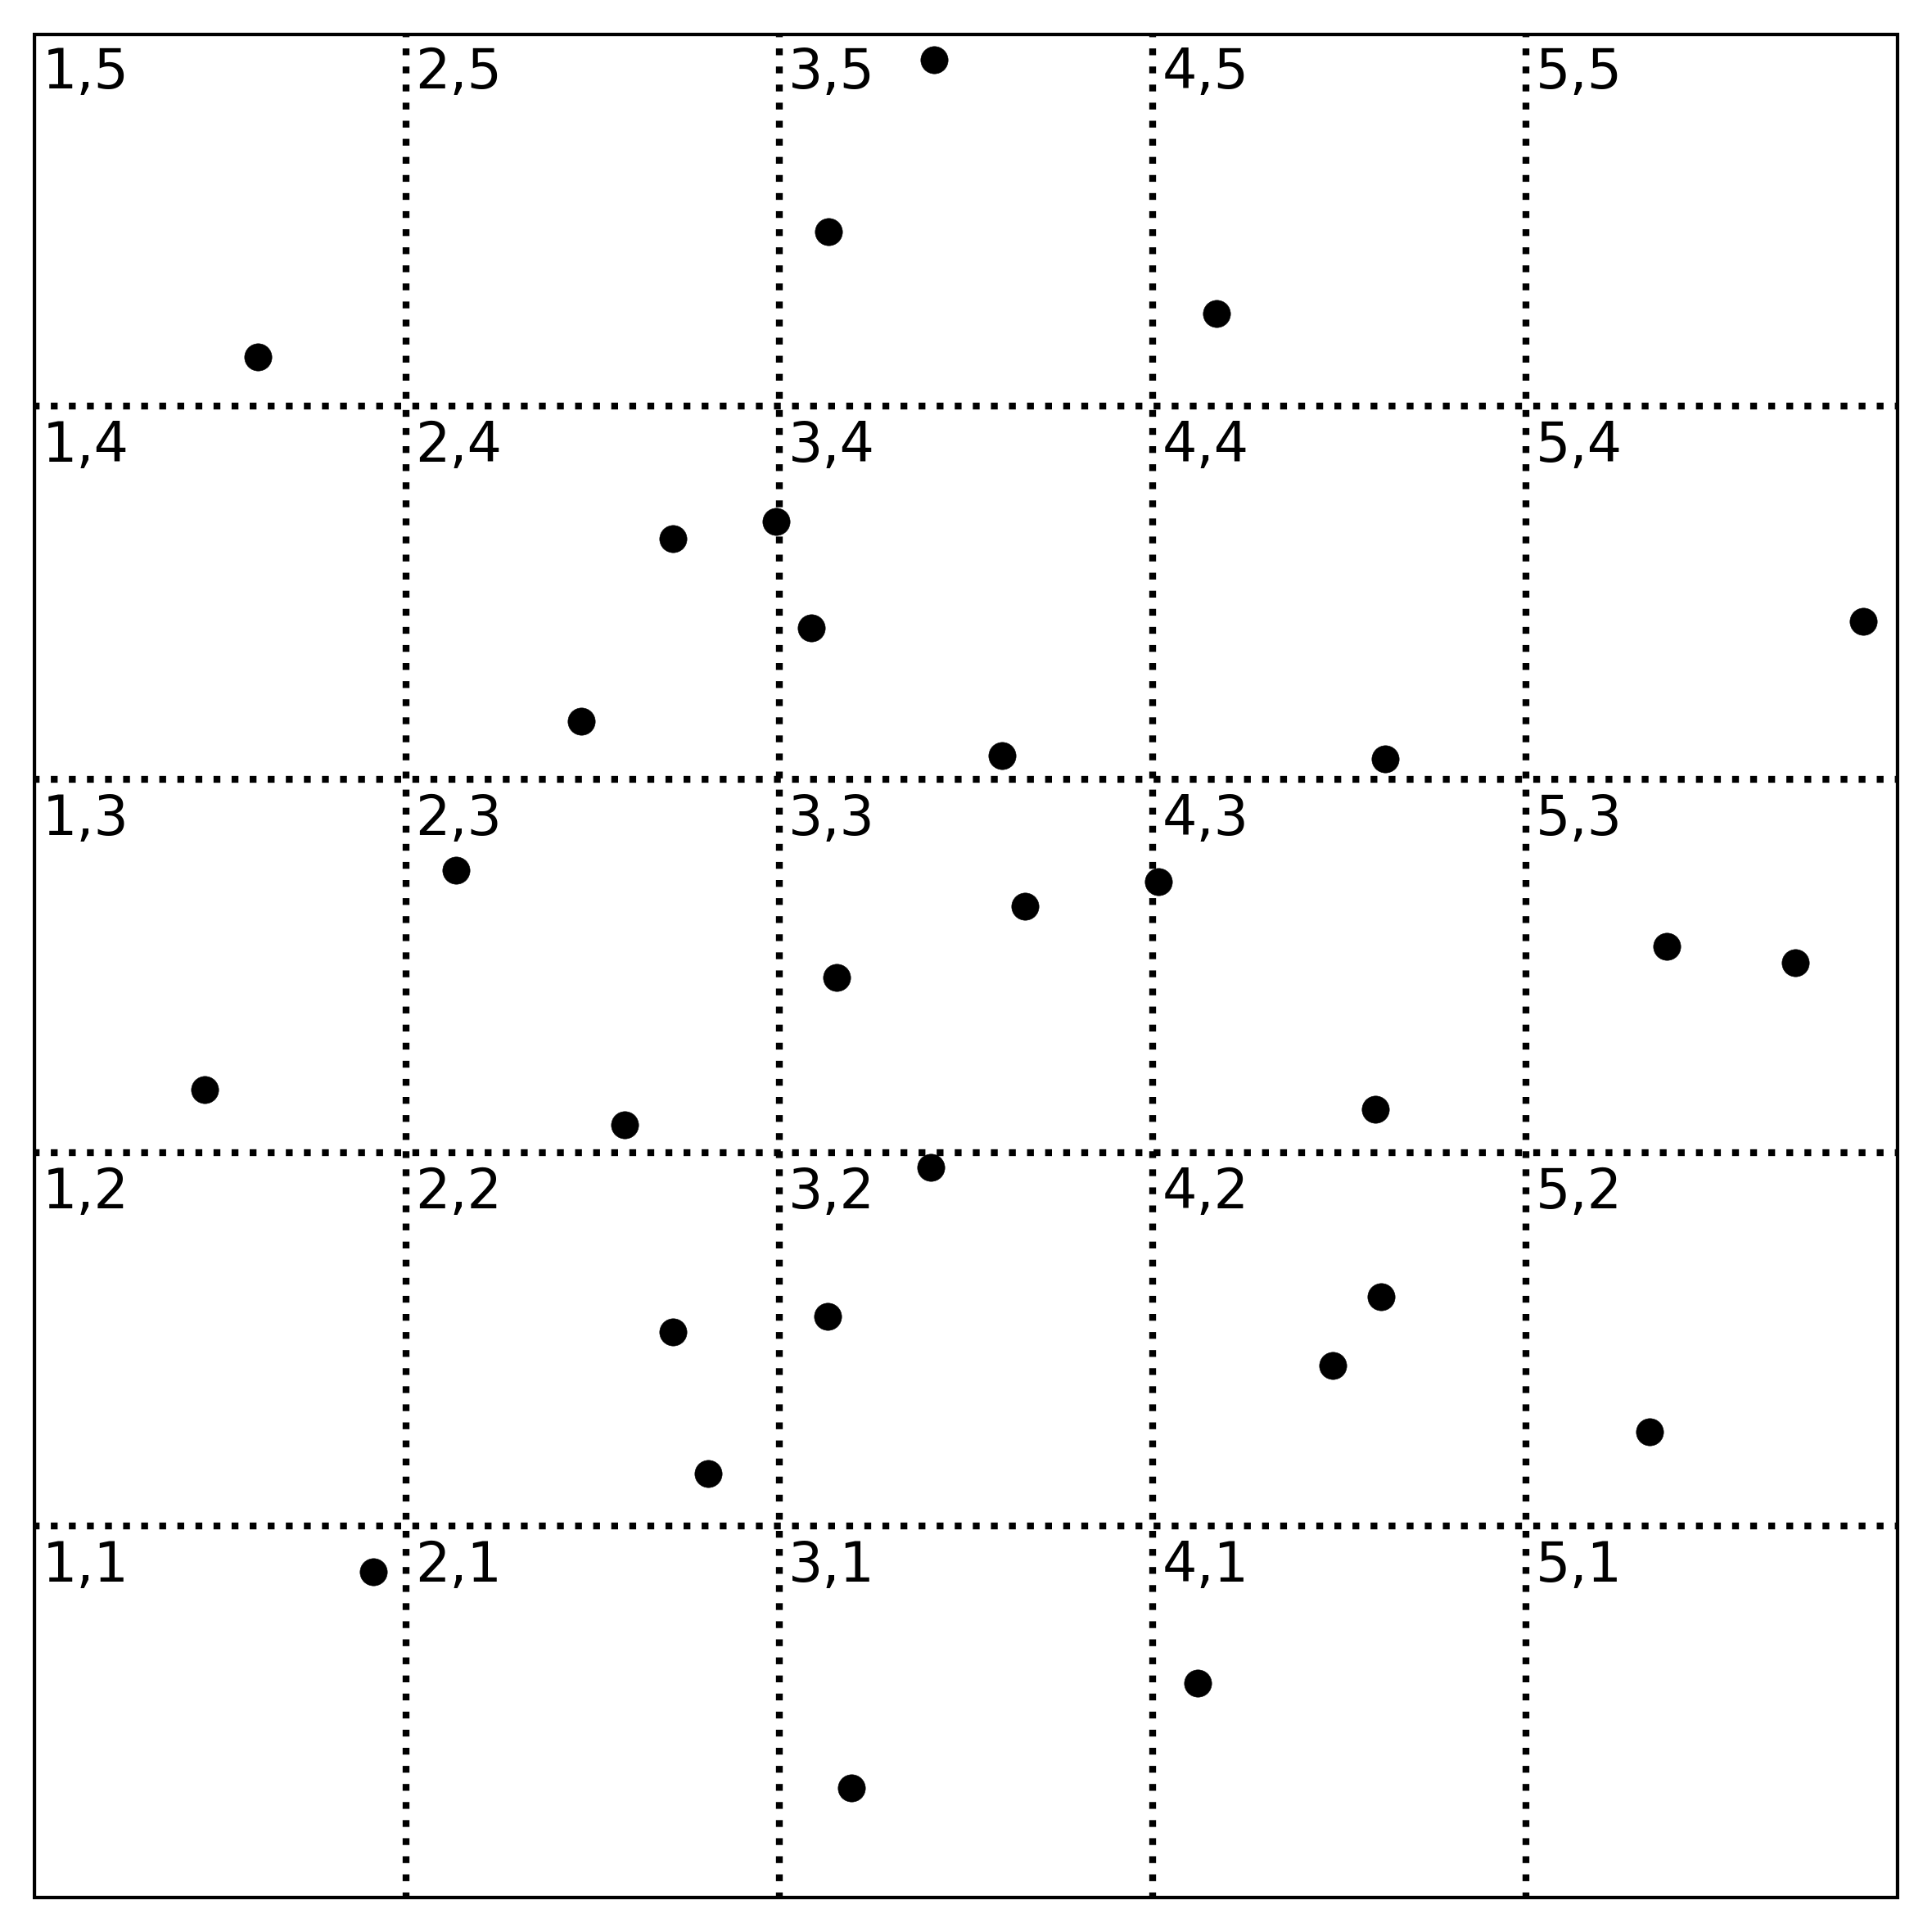

In [3]:
study_region_size = 1000
n_cells = 5
cell_size = study_region_size / n_cells
n_pts = 30

fig, ax = plt.subplots(figsize=(6, 6), dpi=dpi)
fig.set_tight_layout(True)

ax.set_xlim([0, study_region_size])
ax.set_ylim([0, study_region_size])
ax.axes.set_axis_off()

# Draw grid
for x in range(n_cells + 1):
    linestyle = "dotted" if x != 0 and x != n_cells else "-"
    ax.axhline(x * (study_region_size / n_cells), color="black", linestyle=linestyle)
    ax.axvline(x * (study_region_size / n_cells), color="black", linestyle=linestyle)
    
# Label cells
for x in range(n_cells):
    for y in range(n_cells):
        ax.text(x * cell_size + 5, (y + 1) * cell_size - 30, f"{x + 1},{y+1}", fontsize=12)
        
        
# Randomly place some points
np.random.seed(123)
centers = np.random.rand(n_pts, 2) * study_region_size
ax.scatter(centers[:,0], centers[:,1], color="black", linewidth=.1)

plt.savefig("figures/spatial_hash.svg")

plt.show()

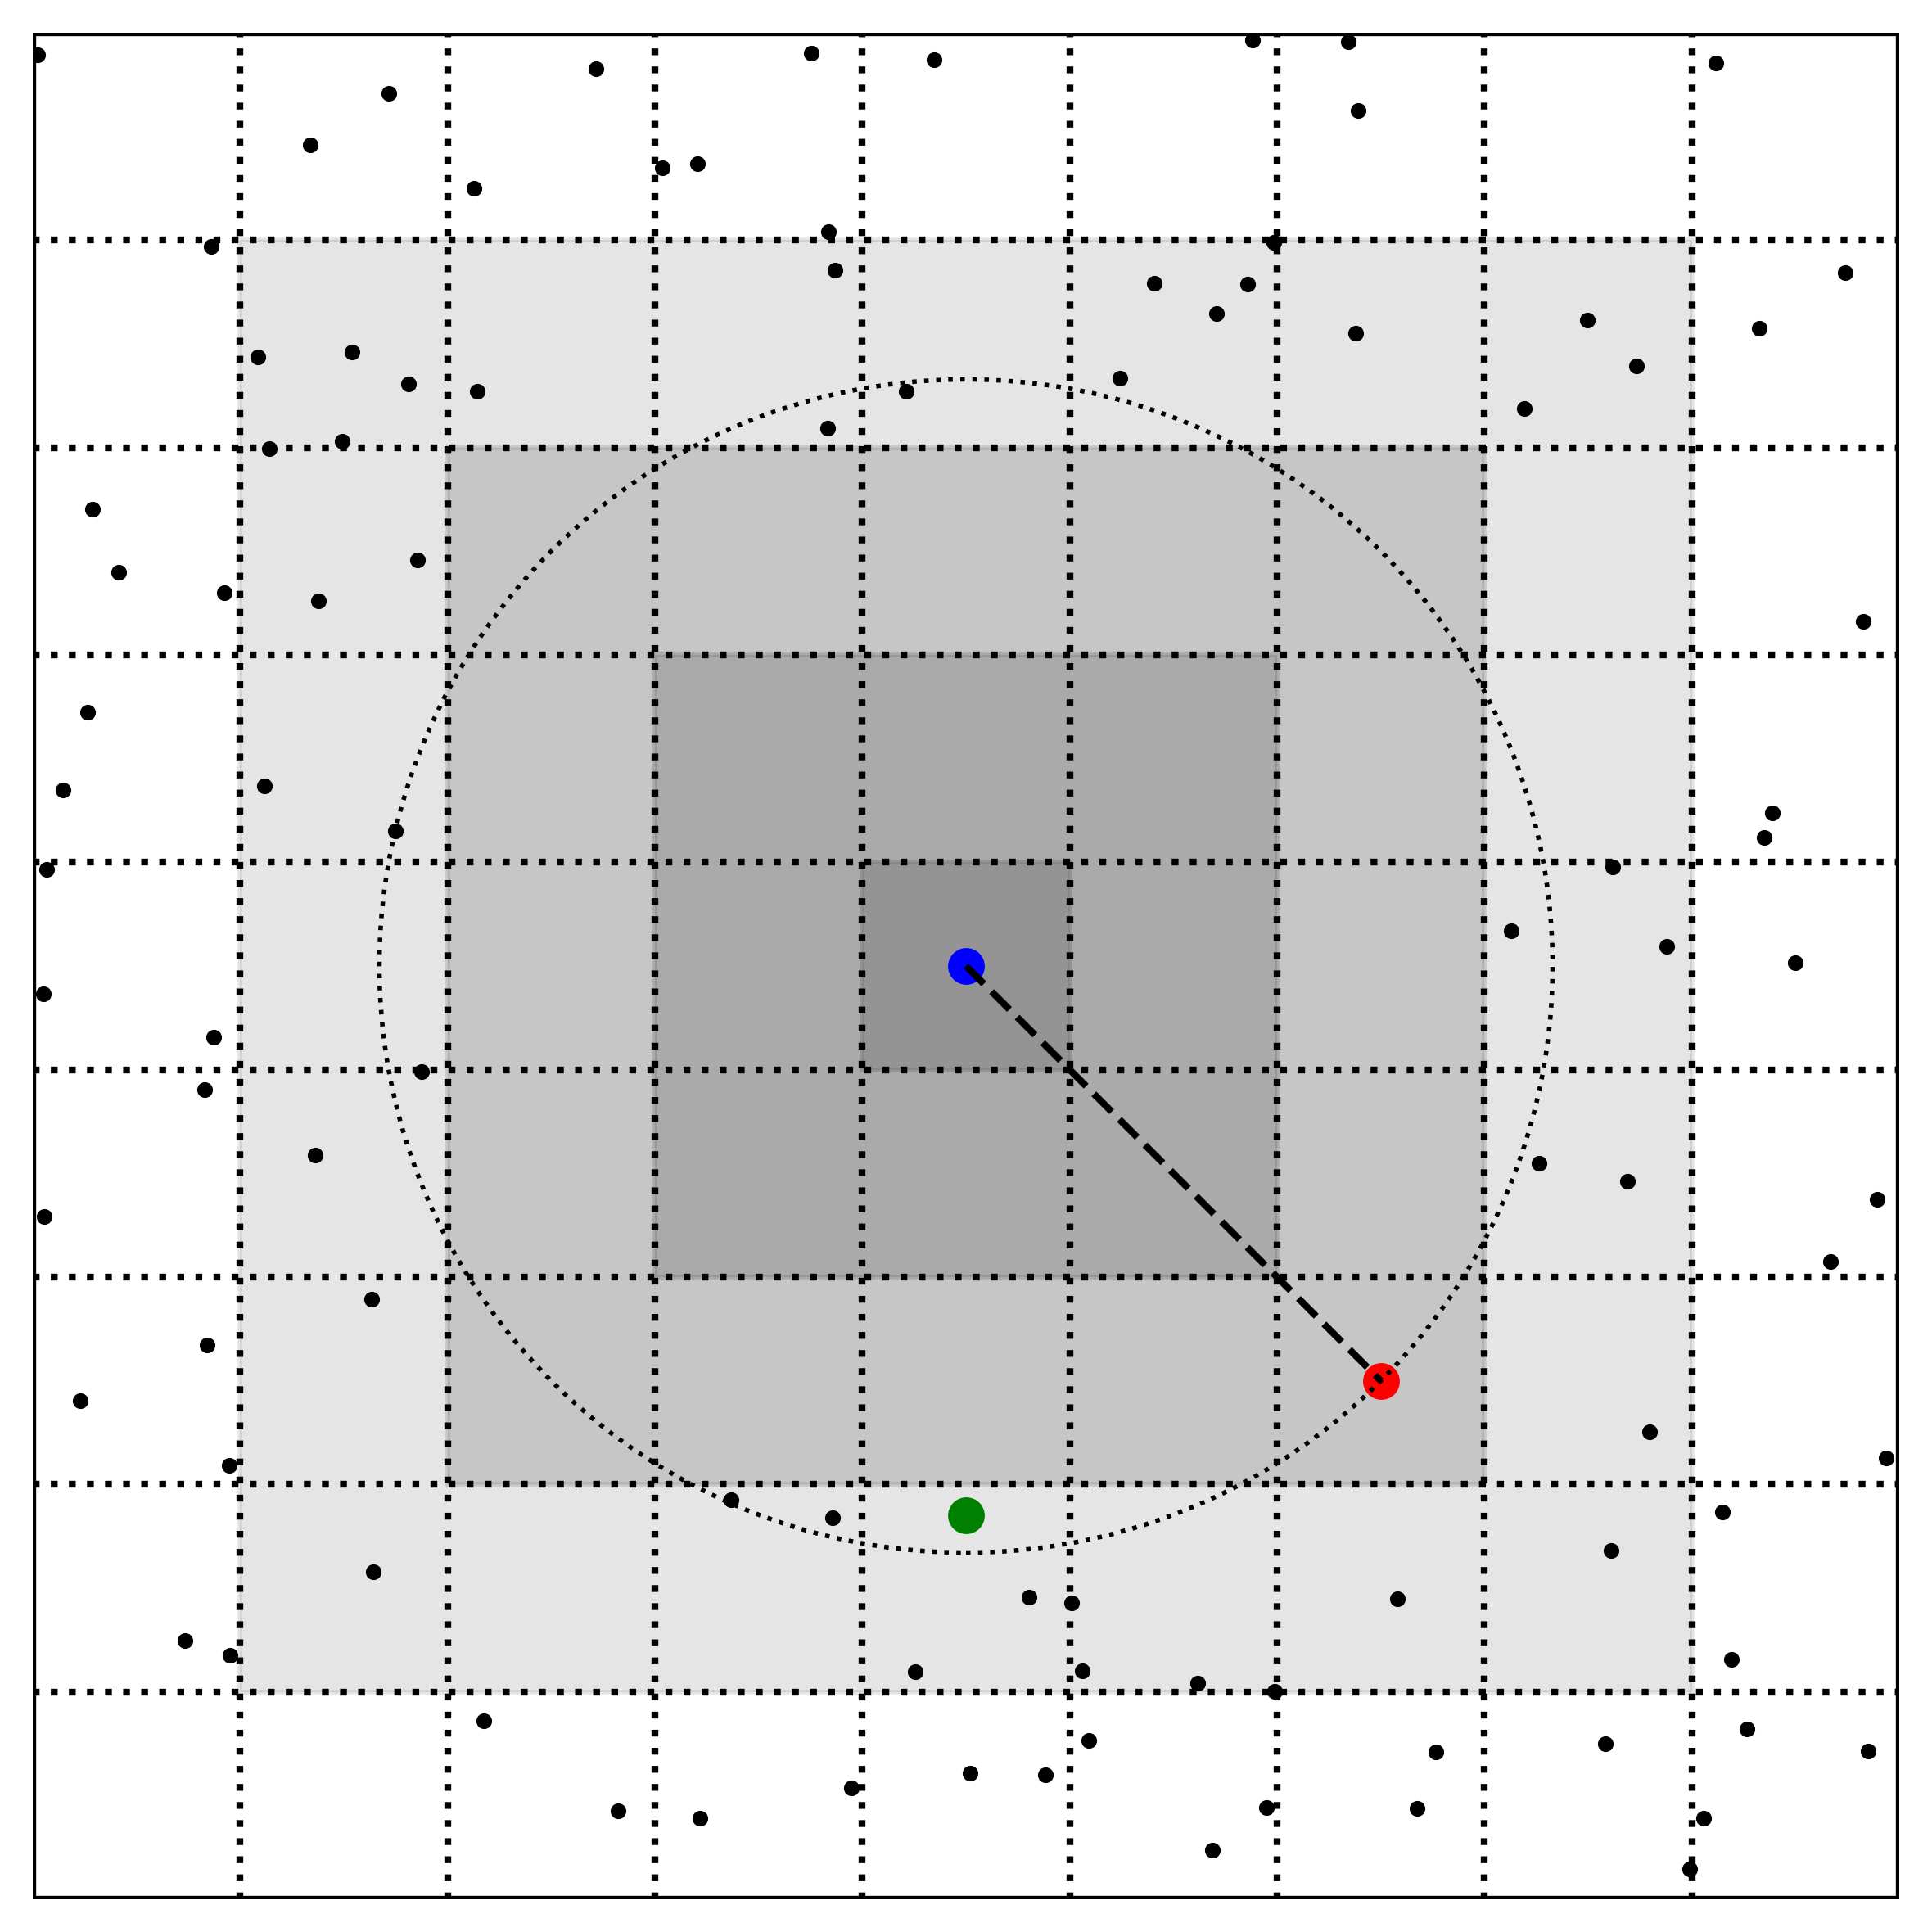

In [4]:
study_region_size = 1000
n_cells = 9
cell_size = study_region_size / n_cells
n_pts = 150

fig, ax = plt.subplots(figsize=(6, 6), dpi=dpi)
fig.set_tight_layout(True)

ax.set_xlim([0, study_region_size])
ax.set_ylim([0, study_region_size])
ax.axes.set_axis_off()


# Draw shaded rectangles indicating radial search pattern
ax.add_patch(matplotlib.patches.Rectangle((n_cells // 2 * cell_size, n_cells // 2 * cell_size),
                                          cell_size,
                                          cell_size,
                                          color="gray",
                                          alpha=0.5))

ax.add_patch(matplotlib.patches.Rectangle(((n_cells // 2 - 1) * cell_size, (n_cells // 2 - 1) * cell_size),
                                          cell_size * 3,
                                          cell_size * 3,
                                          color="gray",
                                          alpha=0.4))

ax.add_patch(matplotlib.patches.Rectangle(((n_cells // 2 - 2) * cell_size, (n_cells // 2 - 2) * cell_size),
                                          cell_size * 5,
                                          cell_size * 5,
                                          color="gray",
                                          alpha=0.3))

ax.add_patch(matplotlib.patches.Rectangle(((n_cells // 2 - 3) * cell_size, (n_cells // 2 - 3) * cell_size),
                                          cell_size * 7,
                                          cell_size * 7,
                                          color="gray",
                                          alpha=0.2))

# Draw grid
for x in range(n_cells + 1):
    linestyle = "dotted" if x != 0 and x != n_cells else "-"
    ax.axhline(x * (study_region_size / n_cells), color="black", linestyle=linestyle)
    ax.axvline(x * (study_region_size / n_cells), color="black", linestyle=linestyle)
            
# Randomly place some points
np.random.seed(123)
centers = np.random.rand(n_pts, 2) * study_region_size
centers = [x for x in centers
           if not ((n_cells // 2 - 2) * cell_size < x[0] < (n_cells // 2 + 3) * cell_size and (n_cells // 2 - 2) * cell_size < x[1] < (n_cells // 2 + 3) * cell_size)
          ]
centers = np.array(centers)
ax.scatter(centers[:,0], centers[:,1], color="black", s=6)

# Place the origin point
ax.scatter([study_region_size / 2], [study_region_size / 2], color="blue", s=50)

# Place the candidate nearest neighbor point
ax.scatter([study_region_size / 2 + cell_size * 2], [study_region_size / 2 - cell_size * 2], color="red", s=50)

# Place the actual nearest neighbor point
ax.scatter([study_region_size / 2], [study_region_size / 2 - cell_size * 2.65], color="green", s=50)

# Draw a line to the nearest neighbor point
ax.plot([study_region_size / 2, study_region_size / 2 + cell_size * 2],
        [study_region_size / 2, study_region_size / 2 - cell_size * 2],
          color="black",
          linestyle="--")

# Plot the search circle
ax.add_patch(matplotlib.patches.Circle((study_region_size / 2, study_region_size / 2),
                                                 radius=cell_size * 2 * np.sqrt(2),
                                                 color="black",
                                                 fill=False,
                                                 lw=1,
                                                 linestyle="dotted"
                                                ))

plt.savefig("figures/radial_search.svg")
plt.show()